# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soupObject = soup(html, 'html.parser')

In [5]:
# Extract the table
table = soupObject.find('table', class_='table')

In [6]:
# Get Rows from Table
rows = table.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list to hold the weather data
marsWeather = []

# Extract headers from the first row
headers = [th.text.strip() for th in rows[0].find_all("th")]

# Loop through the data rows starting from the second row
for row in rows[1:]:  # Start from the second row to skip the header
    # Get the data from the 'td' tags
    dataCells = row.find_all('td')
    
    # List comprehension to extract text from each data cell
    rowData = [cell.text.strip() for cell in dataCells]
    
    # Check if rowData is not empty before appending
    if rowData:  # Only append if rowData is not empty
        # Combine headers and rowData into a dictionary
        marsWeather.append(dict(zip(headers, rowData)))  



In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(marsWeather)

# Confirm the DataFrame
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["sol"] = df["sol"].astype(int)
df["ls"] = df["ls"].astype(int)
df["month"] = df["month"].astype(int)
df["min_temp"] = df["min_temp"].astype(float)
df["pressure"] = df["pressure"].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
marsMonths = df['month'].nunique()
print(f"There are {marsMonths} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
marsDays = df["sol"].nunique()
print(f"There are {marsDays} days worth of data")

There are 1867 days worth of data


In [14]:
# 3. What is the average low temperature by month?
avgLowMonth = df.groupby('month')["min_temp"].mean()

for month, avg_temp in avgLowMonth.items():
    print(f"Month: {month}, \t Avg Min Temp: {avg_temp: .2f}")

Month: 1, 	 Avg Min Temp: -77.16
Month: 2, 	 Avg Min Temp: -79.93
Month: 3, 	 Avg Min Temp: -83.31
Month: 4, 	 Avg Min Temp: -82.75
Month: 5, 	 Avg Min Temp: -79.31
Month: 6, 	 Avg Min Temp: -75.30
Month: 7, 	 Avg Min Temp: -72.28
Month: 8, 	 Avg Min Temp: -68.38
Month: 9, 	 Avg Min Temp: -69.17
Month: 10, 	 Avg Min Temp: -71.98
Month: 11, 	 Avg Min Temp: -71.99
Month: 12, 	 Avg Min Temp: -74.45


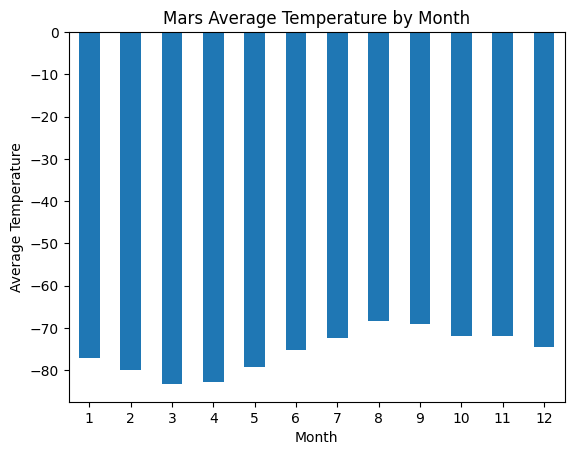

In [15]:
# Plot the average temperature by month
avgLowMonth.plot(x='month', y='avg_temp', kind='bar')

plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Mars Average Temperature by Month')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Convert the Series to a DataFrame
avgLowMonth_df = avgLowMonth.reset_index()
avgLowMonth_df.columns = ['Month', 'Avg_Temp']  # Ensure consistent column names

# Mars Month Names
marsMonthNames = {
    1: "Phobos", 2: "Deimos", 3: "Acheron", 4: "Ares",
    5: "Aphrodite", 6: "Hesperia", 7: "Tharsis", 8: "Noctis",
    9: "Mare Erythraeum", 10: "Amazonis", 11: "Hellas", 12: "Utopia"
}

# Identify the coldest and hottest months
coldestMonth = avgLowMonth_df.loc[avgLowMonth_df['Avg_Temp'].idxmin()]
hottestMonth = avgLowMonth_df.loc[avgLowMonth_df['Avg_Temp'].idxmax()]

# Get Mars month names for coldest and hottest months
coldestMonthName = marsMonthNames[coldestMonth['Month']]
hottestMonthName = marsMonthNames[hottestMonth['Month']]

# Print results with Mars month names
print(f"The coldest month on Mars is {coldestMonthName} with an average temperature of {coldestMonth['Avg_Temp']:.2f}°F.") 
print(f"The warmest month on Mars is {hottestMonthName} with an average temperature of {hottestMonth['Avg_Temp']:.2f}°F.")


The coldest month on Mars is Acheron with an average temperature of -83.31°F.
The warmest month on Mars is Noctis with an average temperature of -68.38°F.


In [17]:
# 4. Average pressure by Martian month
avgPressure = df.groupby('month')["pressure"].mean()

# Loop through and print avg pressure for each month
for month, pressure in avgPressure.items():
    print(f"Month: {month} \t Atmospheric Pressure: {pressure:.2f}")

Month: 1 	 Atmospheric Pressure: 862.49
Month: 2 	 Atmospheric Pressure: 889.46
Month: 3 	 Atmospheric Pressure: 877.32
Month: 4 	 Atmospheric Pressure: 806.33
Month: 5 	 Atmospheric Pressure: 748.56
Month: 6 	 Atmospheric Pressure: 745.05
Month: 7 	 Atmospheric Pressure: 795.11
Month: 8 	 Atmospheric Pressure: 873.83
Month: 9 	 Atmospheric Pressure: 913.31
Month: 10 	 Atmospheric Pressure: 887.31
Month: 11 	 Atmospheric Pressure: 857.01
Month: 12 	 Atmospheric Pressure: 842.16


In [18]:
# Convert the Series to a DataFrame
avgPressure_df = avgPressure.reset_index()  # Use avgPressure for atmospheric pressure data
avgPressure_df.columns = ['Month', 'Avg_Pressure']  # Ensure consistent column names

# Mars Month Names
marsMonthNames = {
    1: "Phobos", 2: "Deimos", 3: "Acheron", 4: "Ares",
    5: "Aphrodite", 6: "Hesperia", 7: "Tharsis", 8: "Noctis",
    9: "Mare Erythraeum", 10: "Amazonis", 11: "Hellas", 12: "Utopia"
}

# Identify the months with the lowest and highest atmospheric pressure
lowestMonth = avgPressure_df.loc[avgPressure_df['Avg_Pressure'].idxmin()]
highestMonth = avgPressure_df.loc[avgPressure_df['Avg_Pressure'].idxmax()]

# Get Mars month names for lowest and highest pressure months
lowestMonthName = marsMonthNames[lowestMonth['Month']]
highestMonthName = marsMonthNames[highestMonth['Month']]

# Print results with Mars month names
print(f"The month with the lowest atmospheric pressure on Mars is {lowestMonthName} with an average pressure of {lowestMonth['Avg_Pressure']:.2f} Pa.") 
print(f"The month with the highest atmospheric pressure on Mars is {highestMonthName} with an average pressure of {highestMonth['Avg_Pressure']:.2f} Pa.")



The month with the lowest atmospheric pressure on Mars is Hesperia with an average pressure of 745.05 Pa.
The month with the highest atmospheric pressure on Mars is Mare Erythraeum with an average pressure of 913.31 Pa.


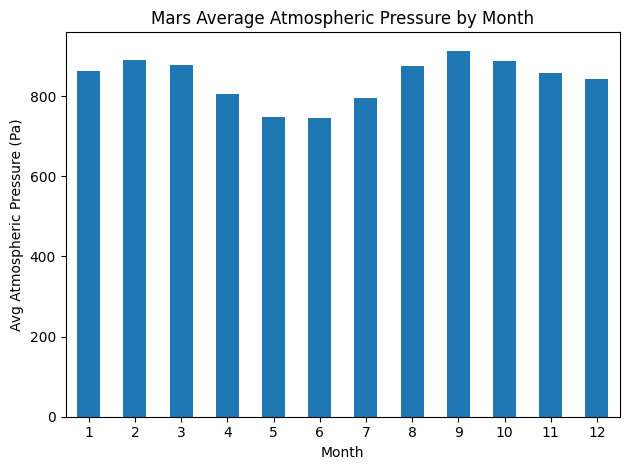

In [19]:
# Plot the average pressure by month
avgPressure.plot(kind='bar')

plt.xlabel('Month')  
plt.ylabel('Avg Atmospheric Pressure (Pa)')
plt.title('Mars Average Atmospheric Pressure by Month')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Average number of Earth days in a Martian year: 687.00 days


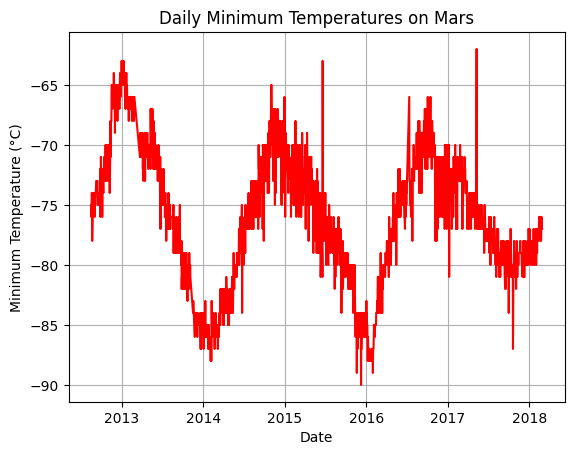

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Sort by terrestrial_date to ensure data is ordered chronologically
df = df.sort_values(by='terrestrial_date')

# Identify transitions from month 12 to month 1 
transitions = df[(df['month'] == 12) & (df['month'].shift(-1) == 1)]

# Calculate the number of terrestrial days in a Martian year
transition_dates = transitions['terrestrial_date']
martianYearLengths = (transition_dates.shift(-1) - transition_dates).dt.days

# Calculate the average length of a Martian year
avgMartianYear = martianYearLengths.mean()

# Print results
print(f"Average number of Earth days in a Martian year: {avgMartianYear:.2f} days")

# Plot the daily minimum temperatures
plt.plot(df['terrestrial_date'], df["min_temp"], color="red")
plt.title('Daily Minimum Temperatures on Mars')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid()
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv("Mars_Data.csv", index=False, header=True, encoding="utf-8")

In [52]:
browser.quit()